# Python Notebook 1: Data Import, Cleaning, Selection, and Analysis

## Imports

In [32]:
# Import Pandas, Numpy, and Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # used for images

# Import ChEMBL API client for retrieving data
from chembl_webresource_client.new_client import new_client

# Import RDKit libraries for cheminformatics and molecular analysis
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import Draw

# Display all columns
pd.set_option('display.max_columns', None)


# Set Working Directory
import os
os.chdir("/Users/danigeiger/Desktop/Capstone/Analysis")
os.getcwd()


'/Users/danigeiger/Desktop/Capstone/Analysis'

In [1]:
import sklearn, numpy, joblib, sys
print("sklearn", sklearn.__version__)
print("numpy", numpy.__version__)
print("joblib", joblib.__version__)
print("python", sys.version)


sklearn 1.6.1
numpy 1.23.5
joblib 1.3.2
python 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:36:46) 
[Clang 16.0.6 ]


## Part 1: Retrieve the ChEMBL Database ID for the CGRP Receptor (Target Protein)

In [33]:
# Instantiate the ChEMBL target client to search for CGRP receptor 
target = new_client.target

# Query ChEMBL for CGRP Type 1 Receptor (CHEMBL3798)
target_query_dict = target.search('CHEMBL3798') 

# Convert the query result into a DataFrame
target_query_df = pd.DataFrame.from_dict(target_query_dict) 
target_query_df

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Calcitonin gene-related peptide type 1 receptor,12.0,False,CHEMBL3798,"[{'accession': 'Q16602', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,"Calcitonin-gene-related peptide receptor, CALC...",10.0,False,CHEMBL2107838,"[{'accession': 'O60894', 'component_descriptio...",PROTEIN COMPLEX,9606
2,[],Homo sapiens,Adrenomedullin receptor AM1; CALCRL/RAMP2,10.0,False,CHEMBL2109232,"[{'accession': 'O60895', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Homo sapiens,"Adrenomedullin receptor, AM2; CALCRL/RAMP3",10.0,False,CHEMBL2111191,"[{'accession': 'Q16602', 'component_descriptio...",PROTEIN COMPLEX,9606


In [34]:
# Index target ChEMBL ID
chemb_id = target_query_df.target_chembl_id[0]

# Filter for CHEMBL3798
filtered_target = target_query_df[target_query_df['target_chembl_id'] == chemb_id]

# Display the filtered result 
filtered_target 

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Calcitonin gene-related peptide type 1 receptor,12.0,False,CHEMBL3798,"[{'accession': 'Q16602', 'component_descriptio...",SINGLE PROTEIN,9606


## Part 2: Retrieve All Ligands Tested on the CGRP Receptor

In [35]:
# Instantiate the ChEMBL activity client to search for bioactivity data  
activity = new_client.activity 

# Query ChEMBL for bioactivity data related to CHEMBL3798 (Calcitonin gene-related peptide type 1 receptor)
chembl_query = activity.filter(target_chembl_id = chemb_id) 

# Convert query into a DataFrame
df_chembl_query = pd.DataFrame.from_dict(chembl_query)

# Save ligand dataset to a CSV file for data sharing (transparency)
df_chembl_query.to_csv("Part1_chembl_query.csv")
df_chembl_query

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,34614,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc([N+](=O)[O-...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,"{'bei': '9.80', 'le': '0.18', 'lle': '-0.58', ...",CHEMBL329678,None,CHEMBL329678,4.39,0,http://www.openphacts.org/units/Nanomolar,164118,=,1,1,=,None,IC50,nM,None,41000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,41.0
1,None,None,37014,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc(N)c2)nc2ccc...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,None,CHEMBL89589,None,CHEMBL89589,None,0,http://www.openphacts.org/units/Nanomolar,164119,>,1,1,>,None,IC50,nM,None,100000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,None,38310,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccccc2)nc2ccc(OC...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,"{'bei': '9.98', 'le': '0.18', 'lle': '-1.04', ...",CHEMBL316211,None,CHEMBL316211,4.02,0,http://www.openphacts.org/units/Nanomolar,164126,=,1,1,=,None,IC50,nM,None,96000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,96.0
3,None,None,39425,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccc3c(c2)OCO3)nc...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,"{'bei': '9.25', 'le': '0.17', 'lle': '-0.66', ...",CHEMBL88111,None,CHEMBL88111,4.13,0,http://www.openphacts.org/units/Nanomolar,164123,=,1,1,=,None,IC50,nM,None,74000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,74.0
4,None,None,39427,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccsc2)nc2ccc(OC)...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,None,CHEMBL88196,None,CHEMBL88196,None,0,http://www.openphacts.org/units/Nanomolar,164122,>,1,1,>,None,IC50,nM,None,100000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25589428,[],CHEMBL5355402,Inhibition of human CGRP1,B,None,None,BAO_0000190,BAO_0000357,single protein format,COc1cc(-c2cc3ccc(O)cc3o2)cc(OC)c1OC,None,None,CHEMBL5352462,Eur J Med Chem,2023,"{'bei': '18.71', 'le': '0.35', 'lle': '1.79', ...",CHEMBL5431521,None,CHEMBL5431521,5.62,0,http://www.openphacts.org/units/Nanomolar,3984099,=,1,1,=,None,IC50,nM,None,2413.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,2.413
1513,"{'action_type': 'INHIBITOR', 'description': 'N...",None,2

### View Standard Type Categories

In [36]:
df_chembl_query.standard_type.value_counts()

standard_type
IC50                     803
Ki                       546
Inhibition                45
Activity                  45
Ratio IC50                24
Relative affinity         18
EC50                      14
Kd                        10
Kb                         6
T1/2                       2
Ratio                      1
Ratio Ki                   1
K                          1
Mean fold stimulation      1
Name: count, dtype: int64

## Part 3: Filter Standard Values for IC50 Data (Ensuring Consistency in Bioactivity Measures)

#### Although multiple inhibition measures are reported in these assay results, each quantifies inhibition in a different way. To train our model accurately, we will focus on a single measure: the IC50 value. As shown above, it is also the most commonly used metric in our dataset. In this context, IC50 represents the concentration of an antagonist required to displace 50% of CGRP from the CGRP receptor.

In [37]:
# Filter the dataset for rows where standard_type is IC50
df_IC50 = df_chembl_query[df_chembl_query['standard_type']== "IC50"].reset_index(drop=True)

# Save filterned IC50 dataset to a CSV file for data sharing (transparency)
df_IC50.to_csv("Part2_IC50.csv")

# Display the filtered DataFrame
df_IC50


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,34614,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc([N+](=O)[O-...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,"{'bei': '9.80', 'le': '0.18', 'lle': '-0.58', ...",CHEMBL329678,None,CHEMBL329678,4.39,0,http://www.openphacts.org/units/Nanomolar,164118,=,1,1,=,None,IC50,nM,None,41000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,41.0
1,None,None,37014,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc(N)c2)nc2ccc...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,None,CHEMBL89589,None,CHEMBL89589,None,0,http://www.openphacts.org/units/Nanomolar,164119,>,1,1,>,None,IC50,nM,None,100000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,None,38310,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccccc2)nc2ccc(OC...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,"{'bei': '9.98', 'le': '0.18', 'lle': '-1.04', ...",CHEMBL316211,None,CHEMBL316211,4.02,0,http://www.openphacts.org/units/Nanomolar,164126,=,1,1,=,None,IC50,nM,None,96000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,96.0
3,None,None,39425,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccc3c(c2)OCO3)nc...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,"{'bei': '9.25', 'le': '0.17', 'lle': '-0.66', ...",CHEMBL88111,None,CHEMBL88111,4.13,0,http://www.openphacts.org/units/Nanomolar,164123,=,1,1,=,None,IC50,nM,None,74000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,74.0
4,None,None,39427,[],CHEMBL654169,Displacement of [125I]hCGRP human Calcitonin g...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccsc2)nc2ccc(OC)...,None,None,CHEMBL1150009,Bioorg Med Chem Lett,1997,None,CHEMBL88196,None,CHEMBL88196,None,0,http://www.openphacts.org/units/Nanomolar,164122,>,1,1,>,None,IC50,nM,None,100000.0,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,"{'action_type': 'ANTAGONIST', 'description': '...",None,23274814,[],CHEMBL4835949,Antagonist activity against human CGRP recepto...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O)...,None,None,CHEMBL4834433,Bioorg Med Chem Lett,2021,None,CHEMBL4848032,None,CHEMBL4848032,10.22,0,http://www.openphacts.org/units/Nanomolar,3621302,=,1,1,=,None,IC50,nM,None,0.06,CHEMBL3798,Homo sapiens,Calcitonin gene-related peptide type 1 receptor,9606,None,None,IC50,nM,UO_0000065,None,0.06
799,"{'action_type': 'ANTAGONIST', 'description': '...",None,23274815,[],

## Part 4: Extract Key Data Fields (Molecule ID, Canonical SMILES, and Bioactivity Standard Value)

In [38]:
# Select Key Data Fields
df_selected_columns = df_IC50[['molecule_chembl_id', 'canonical_smiles', 'standard_value']]

# # Save filterned IC50 dataset to a CSV file for data sharing (transparency)
df_selected_columns.to_csv("Part3_selected_columns.csv")
df_selected_columns

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL329678,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc([N+](=O)[O-...,41000.0
1,CHEMBL89589,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc(N)c2)nc2ccc...,100000.0
2,CHEMBL316211,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccccc2)nc2ccc(OC...,96000.0
3,CHEMBL88111,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccc3c(c2)OCO3)nc...,74000.0
4,CHEMBL88196,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccsc2)nc2ccc(OC)...,100000.0
...,...,...,...
798,CHEMBL4848032,Cn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O)...,0.06
799,CHEMBL4857649,O=C(C[C@@H]1Cc2cc(Cl)c3[nH]c(=O)n(CC(F)(F)F)c3...,0.12
800,CHEMBL4859941,CCn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O...,0.09
801,CHEMBL5431521,COc1cc(-c2cc3ccc(O)cc3o2)cc(OC)c1OC,2413.0


### View Canonical SMILES (Simplified Molecular Line Entry System)

In [39]:
df_selected_columns['canonical_smiles']

0      CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc([N+](=O)[O-...
1      CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc(N)c2)nc2ccc...
2      CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccccc2)nc2ccc(OC...
3      CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccc3c(c2)OCO3)nc...
4      CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccsc2)nc2ccc(OC)...
                             ...                        
798    Cn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O)...
799    O=C(C[C@@H]1Cc2cc(Cl)c3[nH]c(=O)n(CC(F)(F)F)c3...
800    CCn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O...
801                  COc1cc(-c2cc3ccc(O)cc3o2)cc(OC)c1OC
802                   Oc1ccc2cc(-c3cc(O)c(O)c(O)c3)oc2c1
Name: canonical_smiles, Length: 803, dtype: object

## Part 5: Data Cleaning – Removing Duplicates and Handling Missing Values

In [40]:
# Remove rows where standard_value is null 
df_selected_columns = df_selected_columns[df_selected_columns.standard_value.notna()]

# Drop any duplicate molecules
df_IC50_cleaned = df_selected_columns.drop_duplicates(subset = 'molecule_chembl_id', keep = 'first').reset_index(drop=True)

# Export Clean Data to be used in feature engineering
df_IC50_cleaned.to_csv("Part4_IC50_cleansed.csv", index = False) 
df_IC50_cleaned

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL329678,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc([N+](=O)[O-...,41000.0
1,CHEMBL89589,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc(N)c2)nc2ccc...,100000.0
2,CHEMBL316211,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccccc2)nc2ccc(OC...,96000.0
3,CHEMBL88111,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccc3c(c2)OCO3)nc...,74000.0
4,CHEMBL88196,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccsc2)nc2ccc(OC)...,100000.0
...,...,...,...
533,CHEMBL4848032,Cn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O)...,0.06
534,CHEMBL4857649,O=C(C[C@@H]1Cc2cc(Cl)c3[nH]c(=O)n(CC(F)(F)F)c3...,0.12
535,CHEMBL4859941,CCn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O...,0.09
536,CHEMBL5431521,COc1cc(-c2cc3ccc(O)cc3o2)cc(OC)c1OC,2413.0


## Part 6: Categorize Bioactivity Data into Active, Intermediate, and Inactive Classes

#### The thresholds for defining 'active,' 'intermediate,' and 'inactive' are based on established conventions and structure-activity relationship (SAR) principles used in QSAR modeling.

In [41]:
# initalize list
bioactivity_class = [] 

for i in df_IC50_cleaned.standard_value: 
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
         bioactivity_class.append("intermediate") 


bioactivity_class = pd.Series(bioactivity_class, name = 'bioactivity_class')

# assign Series object back to DataFrame
df_IC50_cleaned['bioactivity_class'] = bioactivity_class 

df_IC50_cleaned['bioactivity_class'].value_counts()

bioactivity_class
active          429
intermediate     57
inactive         52
Name: count, dtype: int64

Figure 1: Frequency of Active, Intermediate and Inactive Substances 


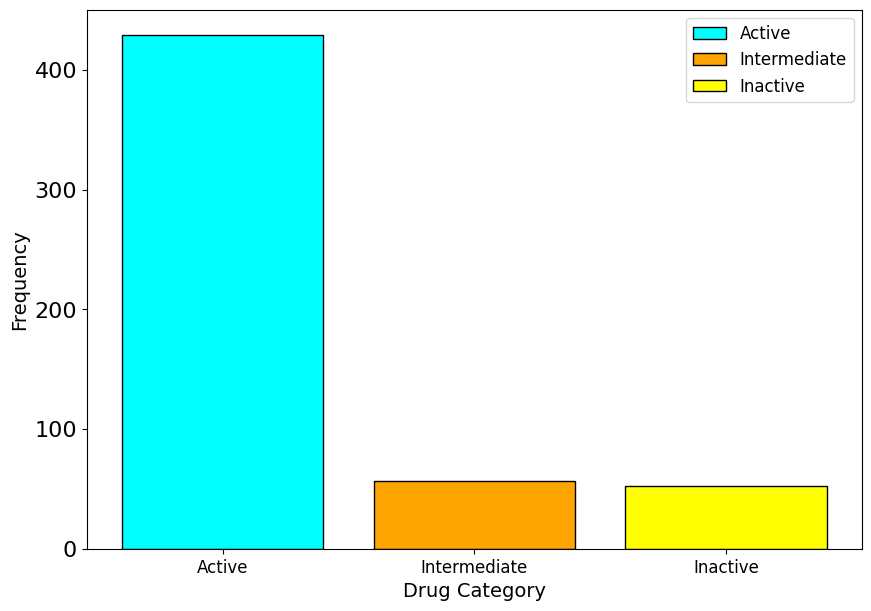

In [42]:
print("Figure 1: Frequency of Active, Intermediate and Inactive Substances ")
count_class = df_IC50_cleaned['bioactivity_class'].value_counts()

categories = ['Active', 'Intermediate', 'Inactive']
counts = [
    count_class.get('active', 0),
    count_class.get('intermediate', 0),
    count_class.get('inactive', 0)
]

# Bar width
bar_width = 0.8

x = np.arange(len(categories))

# Add plot size and details
plt.figure(figsize=(10, 7))  
plt.bar(x, counts, width=bar_width, color=['cyan', 'orange', 'yellow'], 
        edgecolor='black', label=categories)

# Add labels and title
plt.xlabel('Drug Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(x, categories, fontsize=12)  
plt.yticks(fontsize=16)  
plt.legend(categories, fontsize=12, title_fontsize=14)

# Show the plot
plt.show()


## Part 7: Generate Lipinski Descriptors and Merge with Cleaned IC50 Dataset

#### In 1997, a Pfizer chemist observed that successful oral drugs followed a pattern, which he termed the "Rule of Five." This rule outlined four key criteria, all based on multiples of five: a molecule should have no more than 5 hydrogen bond donors, 10 hydrogen bond acceptors, a LogP (octanol-water partition coefficient) not exceeding 5, and a molecular weight of no more than 500 daltons.

#### These factors primarily relate to pharmacokinetics—the drug’s ability to move through the human body without being excreted or metabolized before reaching its target—rather than its ability to bind to the receptor.

In [43]:
def lipinski(smiles, verbose=False):
    # code borrowed from:   (Nantasenamat, 2024)
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:    

        # Calculate molecular weight
        desc_MolWt = Descriptors.MolWt(mol)
        # Calculate the octanol-water coefficient
        desc_MolLogP = Descriptors.MolLogP(mol)
        # Calculate the number of hydrogen bond donors
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        # Calculate the number of hydrogen bond acceptors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol) 
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    # Create column names
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    # Create DataFrame with Lipinski factor numbers and column names
    descriptors = pd.DataFrame(data=baseData,columns=columnNames) 
    
    return descriptors

### Preview Lipinski DataFrame

In [44]:
df_lipinski = lipinski(df_IC50_cleaned.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,447.535,4.9724,1.0,6.0
1,417.553,4.6464,2.0,5.0
2,402.538,5.0642,1.0,4.0
3,446.547,4.7929,1.0,6.0
4,408.567,5.1257,1.0,5.0
...,...,...,...,...
533,633.071,4.0545,2.0,5.0
534,701.068,5.0798,2.0,5.0
535,647.098,4.5374,2.0,5.0
536,300.310,3.8312,1.0,5.0


### Join Molecular ID, Canonical SMILES, and Standard Values with Lipinski Factors

In [45]:
df_analysis = pd.concat([df_IC50_cleaned, df_lipinski], axis =1)
df_analysis

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL329678,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc([N+](=O)[O-...,41000.0,inactive,447.535,4.9724,1.0,6.0
1,CHEMBL89589,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc(N)c2)nc2ccc...,100000.0,inactive,417.553,4.6464,2.0,5.0
2,CHEMBL316211,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccccc2)nc2ccc(OC...,96000.0,inactive,402.538,5.0642,1.0,4.0
3,CHEMBL88111,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccc3c(c2)OCO3)nc...,74000.0,inactive,446.547,4.7929,1.0,6.0
4,CHEMBL88196,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccsc2)nc2ccc(OC)...,100000.0,inactive,408.567,5.1257,1.0,5.0
...,...,...,...,...,...,...,...,...
533,CHEMBL4848032,Cn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O)...,0.06,active,633.071,4.0545,2.0,5.0
534,CHEMBL4857649,O=C(C[C@@H]1Cc2cc(Cl)c3[nH]c(=O)n(CC(F)(F)F)c3...,0.12,active,701.068,5.0798,2.0,5.0
535,CHEMBL4859941,CCn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O...,0.09,active,647.098,4.5374,2.0,5.0
536,CHEMBL5431521,COc1cc(-c2cc3ccc(O)cc3o2)cc(OC)c1OC,2413.0,intermediate,300.310,3.8312,1.0,5.0


## Part 8: Analyze the Distribution of Molecular Weights and Solubility (Polar vs. Non-Polar)


### Create Plot showing Molecular Weight vs. Octanol-Water Partition Coefficinet of the Classes

Figure 2: Lipinski factors, Octanol water partition (LogP) vs. Molecular Weight (MW) off all 538 substances.


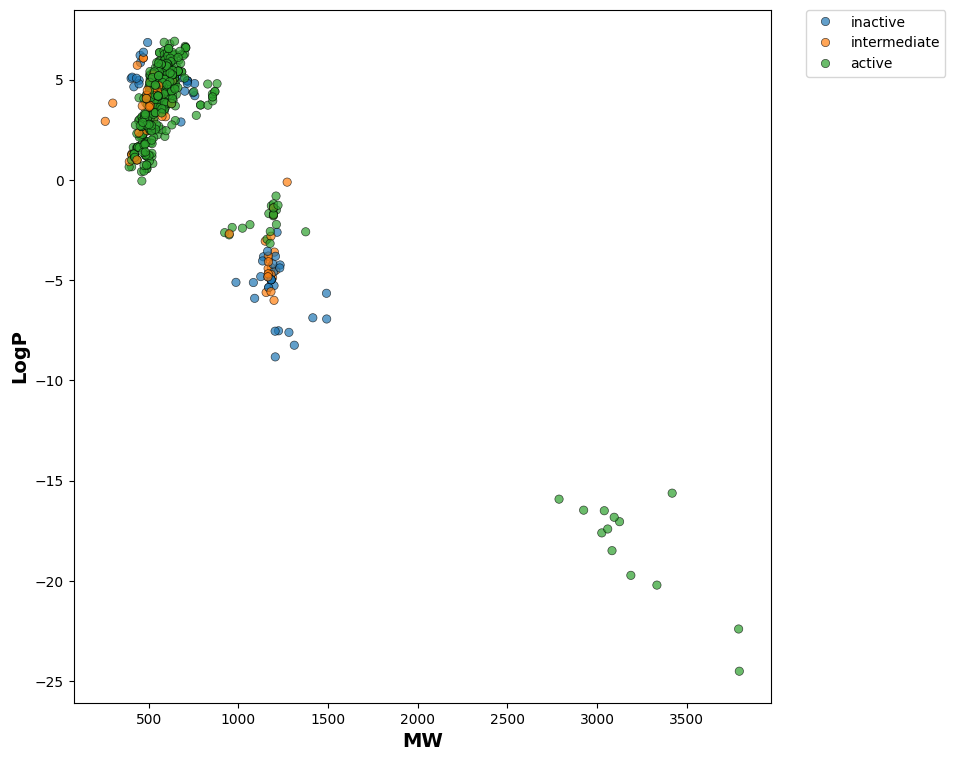

In [46]:
print('Figure 2: Lipinski factors, Octanol water partition (LogP) vs. Molecular Weight (MW) off all 538 substances.')
plt.figure(figsize = (9, 9))

sns.scatterplot(x='MW', y= 'LogP', data = df_analysis, hue = 'bioactivity_class', edgecolor= 'black', alpha = 0.7)

plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### Filter for Molecular Weight of Less than 2500 Daltons

In [47]:
df_two_clusters = df_analysis[df_analysis['MW'] < 2500]

Figure 3: A closer look at molecules smaller than 2000 daltons. One of our machine learning models will train on this subset of 525 instances, as the remaining 13 molecules are unlikely to fully interact with the CGRP receptor, which might convolute the model.


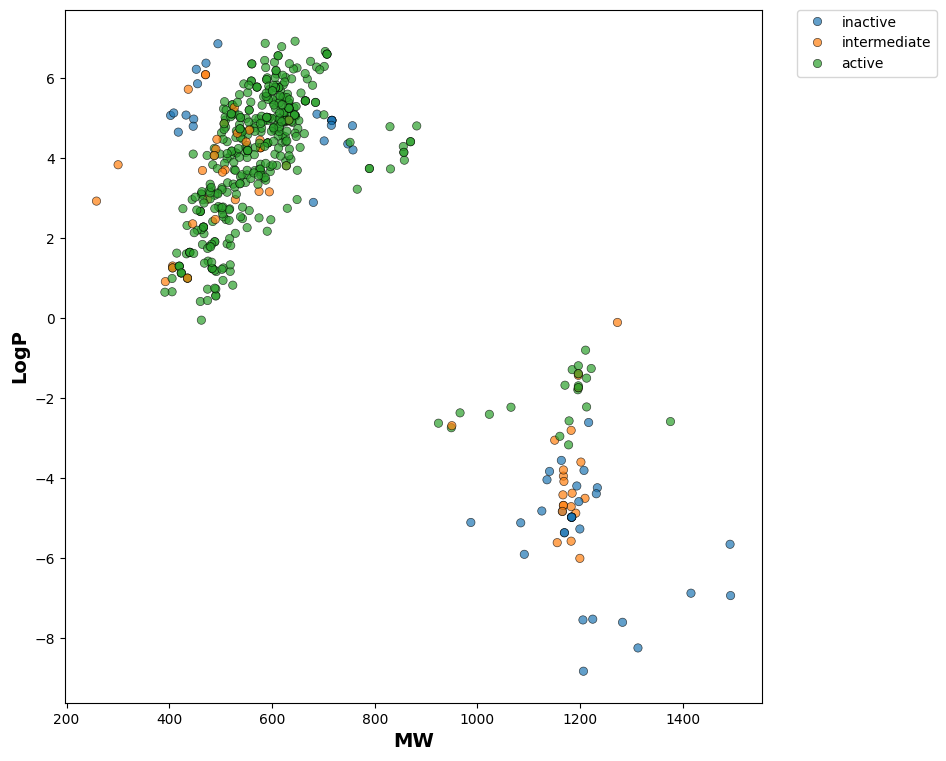

In [48]:
print('Figure 3: A closer look at molecules smaller than 2000 daltons. One of our machine learning models will train on this subset of 525 instances, as the remaining 13 molecules are unlikely to fully interact with the CGRP receptor, which might convolute the model.')

plt.figure(figsize = (9, 9))

sns.scatterplot(x='MW', y= 'LogP', data = df_two_clusters, hue = 'bioactivity_class', edgecolor= 'black', alpha = 0.7)

plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

Lipinski's Rule of 5 and the current Market Gepants....

In [49]:
print('FDA Approved / Current available gepant drugs on the market meet Lapinski Rules except on molecular weights which are just over teh 500 dalton threshold.')
FDA_approved_gepants = pd.read_csv('FDA_approved_gepants.csv')
df_lipinski_FDA_approved_gepants = lipinski(FDA_approved_gepants.canonical_smiles)
df_lipinski_FDA_approved_gepants = pd.concat([FDA_approved_gepants, df_lipinski_FDA_approved_gepants], axis=1)
df_lipinski_FDA_approved_gepants


FDA Approved / Current available gepant drugs on the market meet Lapinski Rules except on molecular weights which are just over teh 500 dalton threshold.


,Generic name,Brand Name,Chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,Ubrelvy,Ubrogepant,CHEMBL2364638,C[C@@H]1[C@H](c2ccccc2)C[C@H](NC(=O)c2cnc3c(c2...,549.553,3.53060,2.0,5.0
1,Nurtec,Rimegepant,CHEMBL2178422,N[C@@H]1c2cccnc2[C@H](OC(=O)N2CCC(n3c(=O)[nH]c...,534.567,4.49000,2.0,7.0
2,Qualipta,Atogepant,CHEMBL3991065,C[C@@H]1[C@H](c2c(F)ccc(F)c2F)C[C@H](NC(=O)c2c...,603.523,3.94790,2.0,5.0
3,Zavzpret,Zauzpret,CHEMBL2397415,Cc1cc(C[C@@H](NC(=O)N2CCC(c3cc4ccccc4[nH]c3=O)...,638.817,3.45152,3.0,6.0


## Part 9: Statistical Analysis – Mann-Whitney U Tests and Box Plots Comparing Lipinski Factors of Active vs. Inactive Drugs

In [50]:
def mannwhitney(descriptor, verbose= False):
    # code borrowed from:   (Brownlee, 2019)
    
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    #seed the random number genergator 
    seed(1)

    #actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_analysis[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]

    selection = [descriptor, 'bioactivity_class']
    df = df_analysis[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)

    # interpret
    alpha = 0.5
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor': descriptor,
                            'Statistics': stat,
                            'p': p,
                            'alpha': alpha,
                            'Interpretation': interpretation}, index =[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    
    return results
    

Figure 4: Box plots of molecular weight vs. drug classification 


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,5301.0,6.300209e-10,0.5,Different distribution (reject H0)


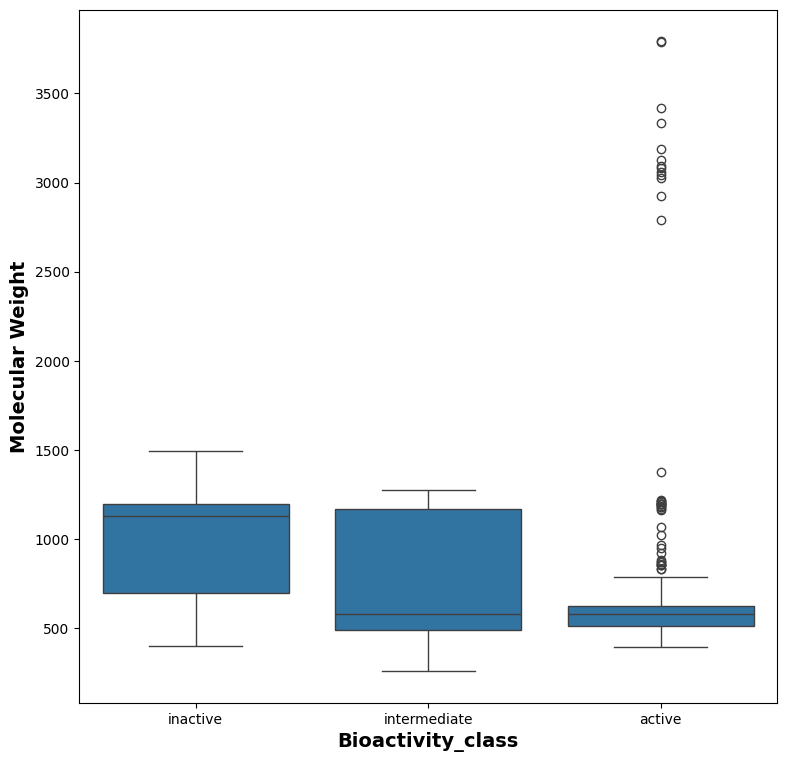

In [51]:
plt.figure(figsize = (9, 9))
print("Figure 4: Box plots of molecular weight vs. drug classification ")
sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_analysis)

plt.xlabel('Bioactivity_class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Molecular Weight', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_MW.pdf')
mannwhitney('MW') 

Figure 5: Box plots of Octanol_water partition coefficient vs. drug classification 


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,15379.0,0.000008,0.5,Different distribution (reject H0)


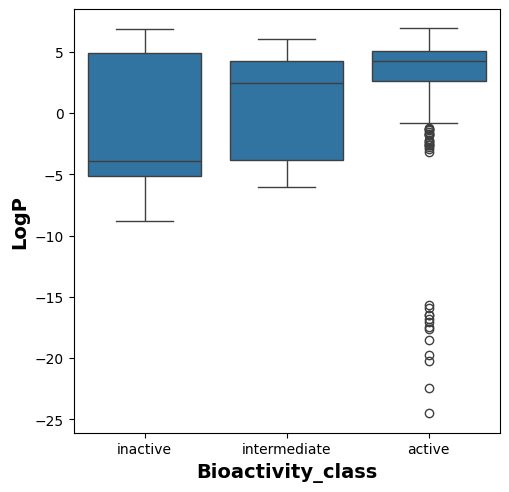

In [52]:
print("Figure 5: Box plots of Octanol_water partition coefficient vs. drug classification ")

plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_analysis)

plt.xlabel('Bioactivity_class', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_LogP.pdf')

mannwhitney('LogP')

Figure 6: Box plots of Number of Hydrogen Bond donors vs. drug classification 


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,5185.0,1.243615e-11,0.5,Different distribution (reject H0)


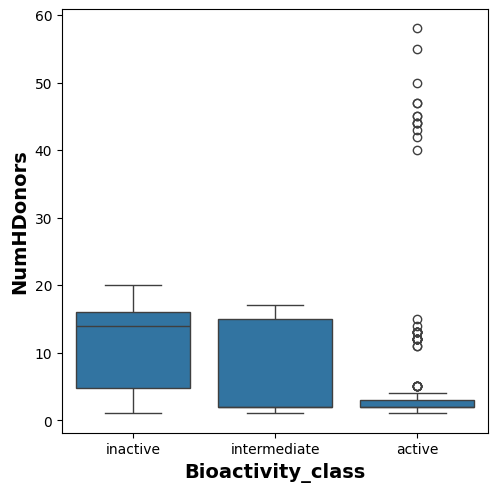

In [53]:
print("Figure 6: Box plots of Number of Hydrogen Bond donors vs. drug classification ")

plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_analysis)

plt.xlabel('Bioactivity_class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHDonors', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_NumHDonors.pdf')

mannwhitney('NumHDonors')

Figure 7: Box plots of Number of Hydrogen Bond Acceptors vs. drug classification 


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,6997.5,0.000007,0.5,Different distribution (reject H0)


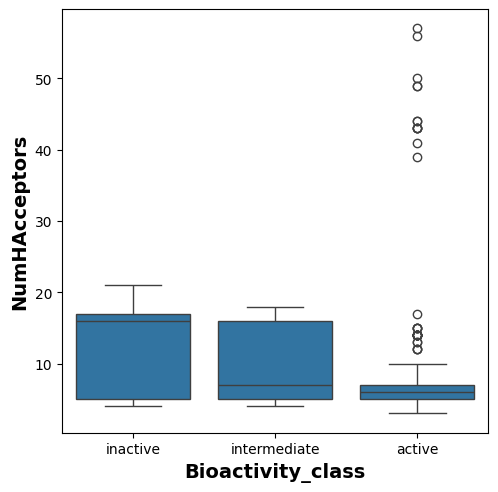

In [54]:
print("Figure 7: Box plots of Number of Hydrogen Bond Acceptors vs. drug classification ")

plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_analysis)

plt.xlabel('Bioactivity_class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHAcceptors', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_NumHAcceptors.pdf')

mannwhitney('NumHAcceptors')

## Part 10: Visualization of Antagonist Size and Physical Contact with the CGRP Receptor

Figure 8: Telcagepant and Olcegepant modifying the structure of human CGRP receptor, causing inhibition. Telcagepant and Olcegepant have a molecular weight of 567 and 870 daltons, respectively.


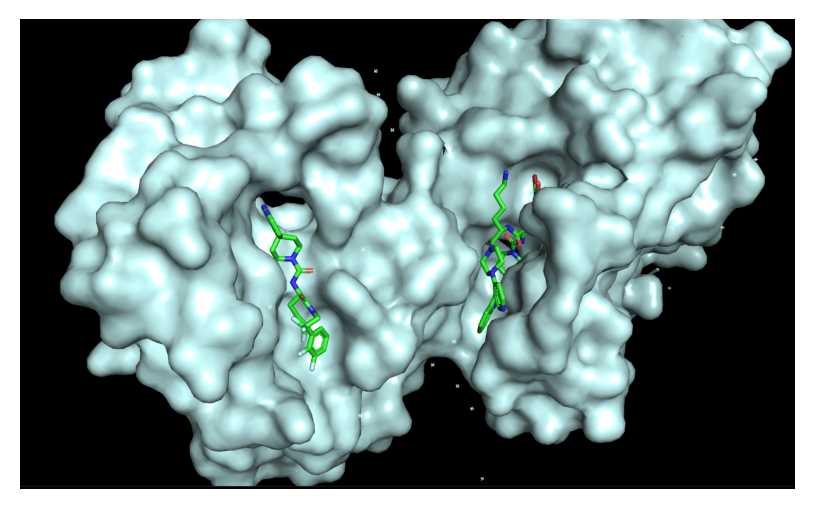

In [55]:
print('Figure 8: Telcagepant and Olcegepant modifying the structure of human CGRP receptor, causing inhibition. Telcagepant and Olcegepant have a molecular weight of 567 and 870 daltons, respectively.')

# Load and display the image
img = mpimg.imread('inhibition_CGRPr.png')
plt.figure(figsize = (5,5), dpi = 200)
plt.imshow(img)
plt.axis('off')  # Hide axes for a cleaner display
plt.show()

Figure 9: 'Erenumab 1, a monoclonal antibody inhibitor, shown bound to the CGRP heterodimer (depicted as the yellow and green ribbons). Since a large portion of its surface area does not interact with the CGRP receptor, it would not be suitable for training our machine learning model. Like other FDA-approved CGRP inhibitors, Erenumab weighs approximately 150,000 daltons—making it 250 times larger than small molecules, which can interact more effectively with the receptor.'


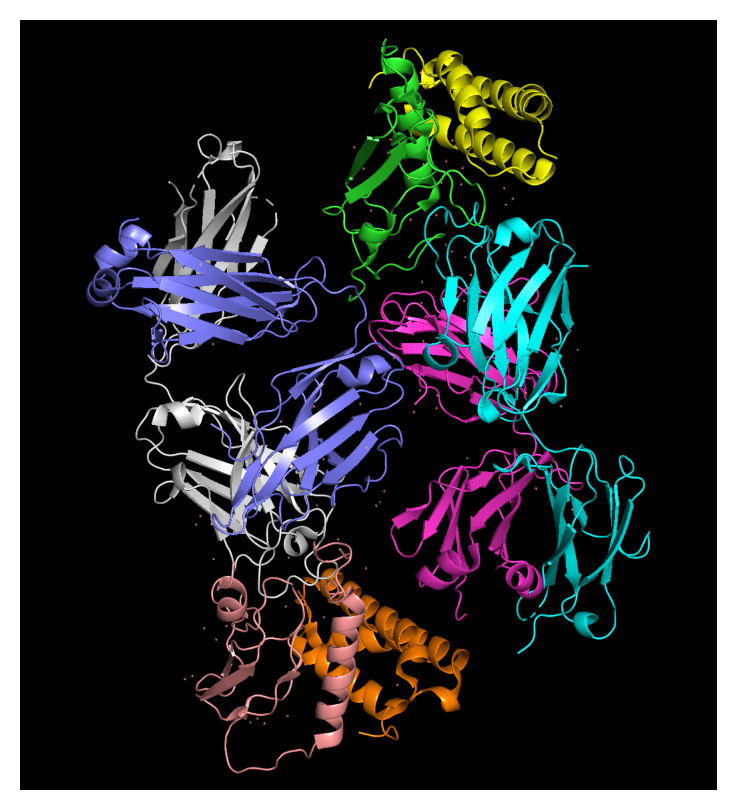

In [56]:
print("Figure 9: 'Erenumab 1, a monoclonal antibody inhibitor, shown bound to the CGRP heterodimer (depicted as the yellow and green ribbons). Since a large portion of its surface area does not interact with the CGRP receptor, it would not be suitable for training our machine learning model. Like other FDA-approved CGRP inhibitors, Erenumab weighs approximately 150,000 daltons—making it 250 times larger than small molecules, which can interact more effectively with the receptor.'")

# Load and display the image
img = mpimg.imread('Erenumab_CGRP.png')
plt.figure(figsize = (5,5), dpi = 200)
plt.imshow(img)
plt.axis('off') 
plt.show()

## Part 11: Curating a Low-Molecular-Weight Compound Set (<2000 Da) for Further Analysis

Figure 10: Lipinski factors, Octanol water partition (LogP) vs. Molecular Weight (MW) off all 538 substances.


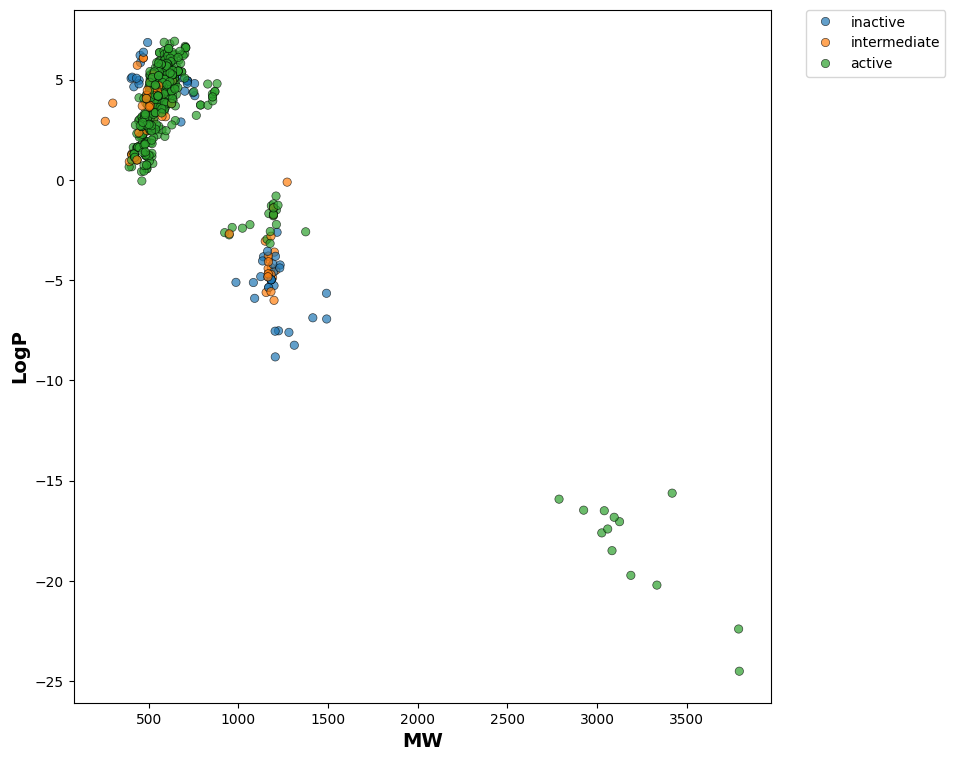

In [57]:
print('Figure 10: Lipinski factors, Octanol water partition (LogP) vs. Molecular Weight (MW) off all 538 substances.')
plt.figure(figsize = (9, 9))

sns.scatterplot(x='MW', y= 'LogP', data = df_analysis, hue = 'bioactivity_class', edgecolor= 'black', alpha = 0.7)

plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

In [58]:
# Filter the dataset to include only low-molecular-weight compounds (<2000 Da)  
df_low_mw = df_analysis[df_analysis['MW'] < 2000].reset_index(drop=True)  

# Select only relevant columns for machine learning and molecular identification  
df_low_mw = df_low_mw[['molecule_chembl_id', 'canonical_smiles', 'standard_value']]  

# Save the filtered dataset for data transparency 
df_low_mw.to_csv("Part10_low_mw.csv", index=False)  

# Display DataFrame  
df_low_mw  


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL329678,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc([N+](=O)[O-...,41000.0
1,CHEMBL89589,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2cccc(N)c2)nc2ccc...,100000.0
2,CHEMBL316211,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccccc2)nc2ccc(OC...,96000.0
3,CHEMBL88111,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccc3c(c2)OCO3)nc...,74000.0
4,CHEMBL88196,CCC1CN2CCC1CC2[C@H](O)c1cc(-c2ccsc2)nc2ccc(OC)...,100000.0
...,...,...,...
520,CHEMBL4848032,Cn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O)...,0.06
521,CHEMBL4857649,O=C(C[C@@H]1Cc2cc(Cl)c3[nH]c(=O)n(CC(F)(F)F)c3...,0.12
522,CHEMBL4859941,CCn1c(=O)[nH]c2c(Cl)cc3c(c21)CN(CC(F)(F)F)C(=O...,0.09
523,CHEMBL5431521,COc1cc(-c2cc3ccc(O)cc3o2)cc(OC)c1OC,2413.0


## Part 12: A Final Look at the Complexity of Similar Sized Inactive and Active Candidates


Figure 11: Active molecules with a molecular weight between 1100 daltons and 1300 daltons


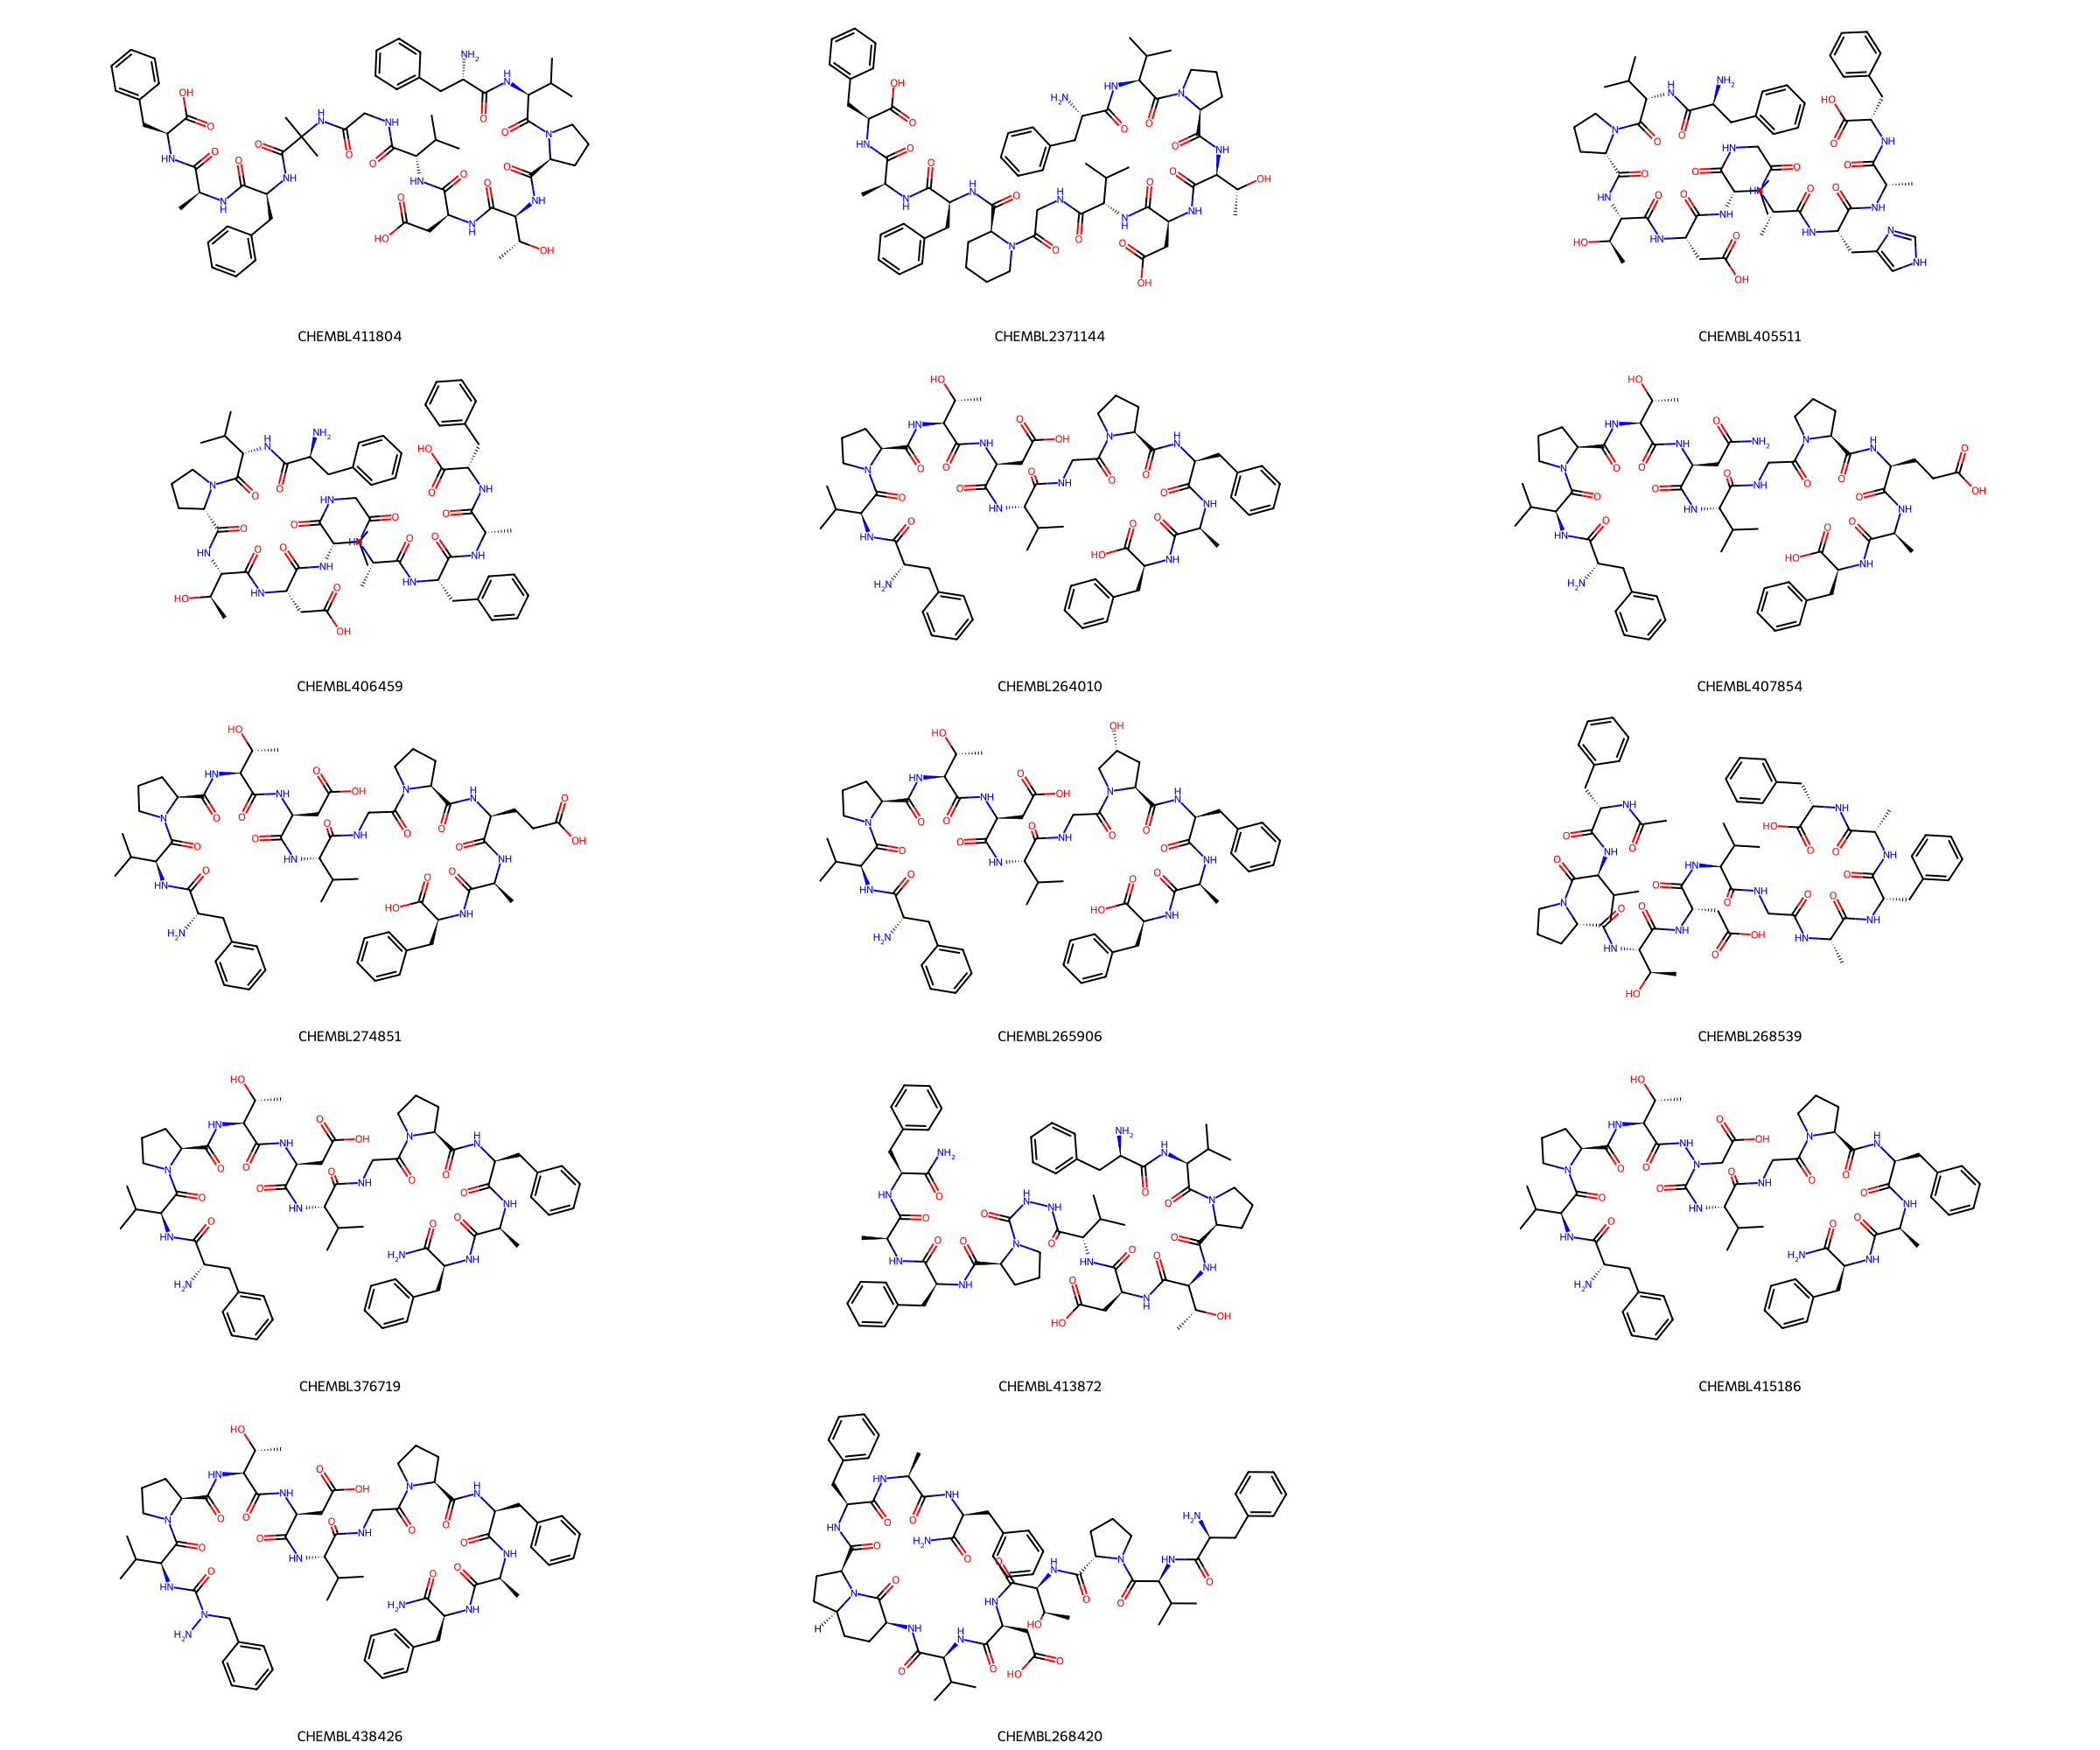

In [59]:
print("Figure 11: Active molecules with a molecular weight between 1100 daltons and 1300 daltons")

active_molecules = df_analysis[(df_analysis['bioactivity_class'] == 'active') & 
                                (df_analysis['MW'] > 1100) & 
                                (df_analysis['MW'] < 1300)]

# Convert SMILES to RDKit molecule objects
mols = [Chem.MolFromSmiles(smiles) for smiles in active_molecules['canonical_smiles']]

# Display the molecular structures
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(800, 400), legends=active_molecules['molecule_chembl_id'].tolist())



Figure 12: Inactive molecules with a molecular weight between 1100 daltons and 1300 daltons.


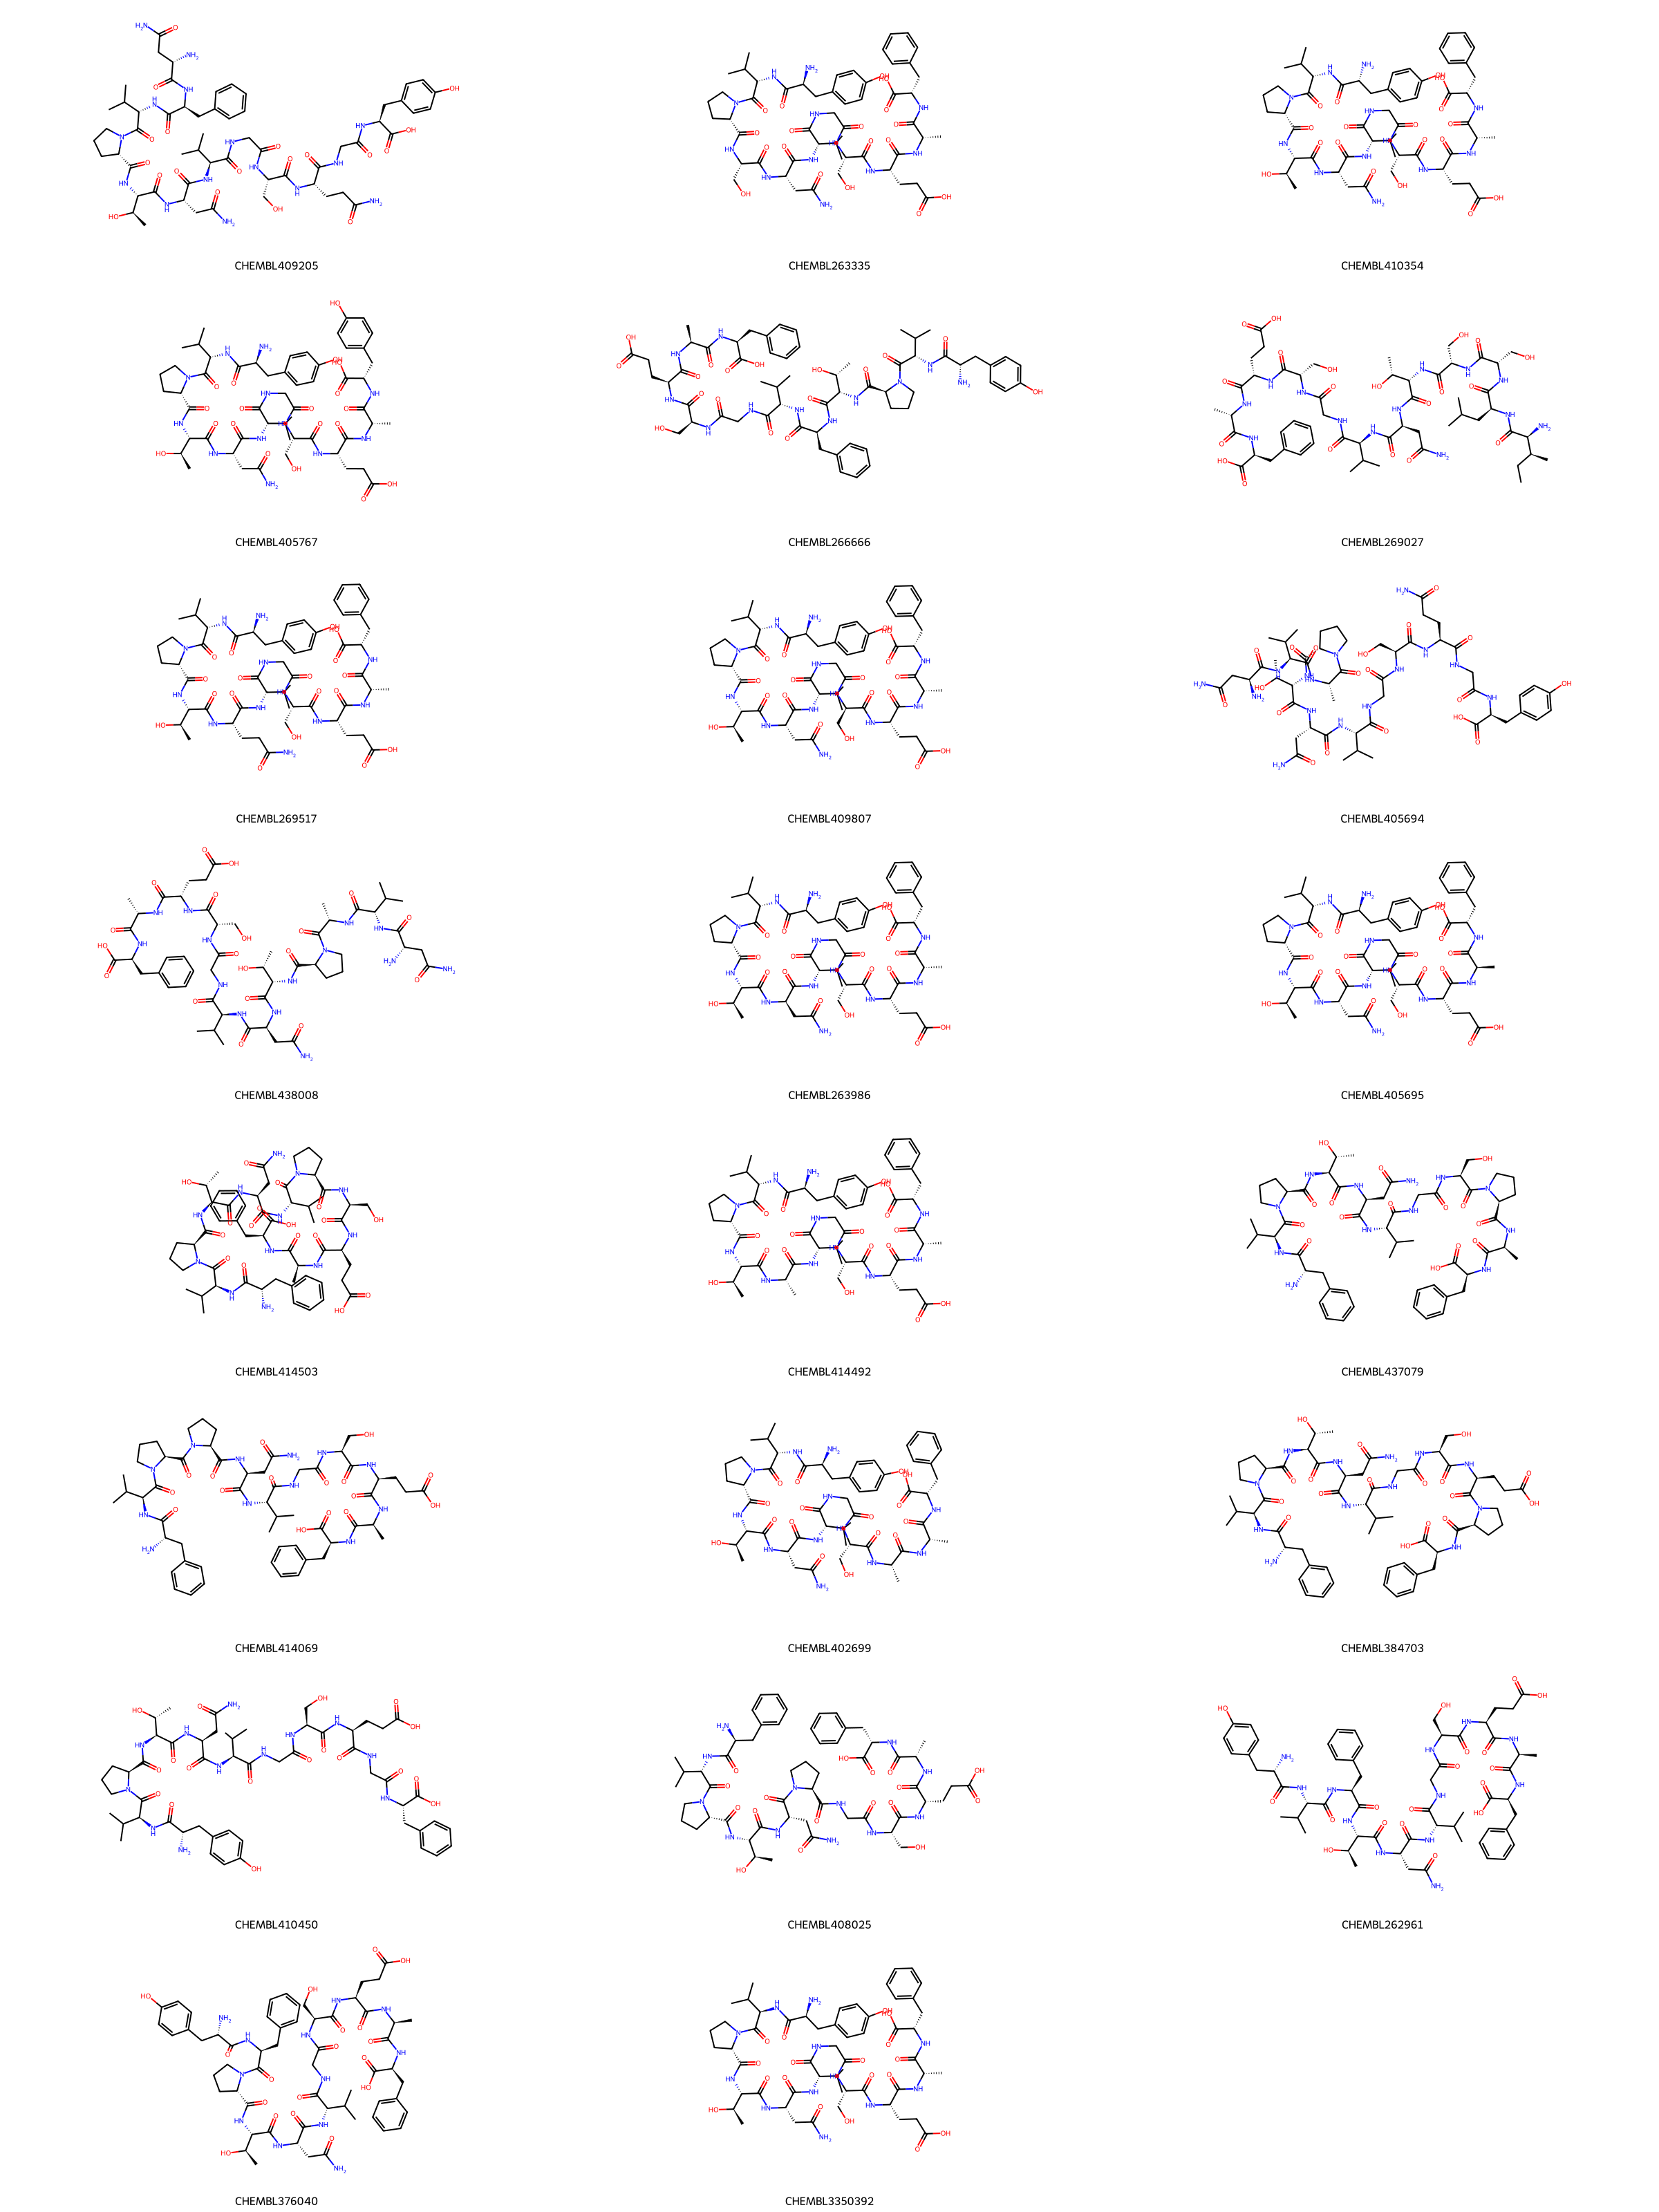

In [60]:
print("Figure 12: Inactive molecules with a molecular weight between 1100 daltons and 1300 daltons.")

inactive_molecules = df_analysis[(df_analysis['bioactivity_class'] == 'inactive') & 
                                (df_analysis['MW'] > 1100) & 
                                (df_analysis['MW'] < 1300)]

# Convert SMILES to RDKit molecule objects
mols = [Chem.MolFromSmiles(smiles) for smiles in inactive_molecules['canonical_smiles']]

# Display the molecular structures
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(800, 400), legends=inactive_molecules['molecule_chembl_id'].tolist())


#### The above selection of similarly sized active and inactive drugs highlights  the complexity of receptor-ligand binding as differences in inactive and active molecules are not obvious to the naked eye. This is even further complicated when you consider that the molecules are three dimentional and consist of mostely rotatable (single) bonds, which are going to rotate to fit their environment with the lowest entropy configuration.

## Credits - Acknowledgments and References

#### I would like to express my sincere gratitude to Natasenamat for his YouTube video, which provided valuable guidance in curating my data, performing feature engineering using PaDELpy, and lead much of my data analysis above. 

References 

Brownlee, J. (2019, August 21). How to calculate nonparametric statistical hypothesis tests in Python. Machine Learning Mastery. Retrieved February 26, 2025, from https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/


Nantasenamat, C. (2024, February 19). 'Bioinformatics project from scratch - Drug discovery part 1 (Data collection and pre-processing)' [Video]. YouTube. [https://www.youtube.com/watch?v=plVLRashaA8](https://www.youtube.com/watch?v=plVLRashaA8)